In [2]:
import os
import requests
import zipfile
import shutil
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import *
from sklearn.preprocessing import *
from sklearn.neighbors import *

In [3]:
years = [1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]
os.mkdir("accident_all_years")
for i in years:
    url = f"https://static.nhtsa.gov/nhtsa/downloads/FARS/{i}/National/FARS{i}NationalCSV.zip"
    r = requests.get(url)
    with open(f'{i}.zip', 'wb') as f:
        f.write(r.content)
    with zipfile.ZipFile(f'{i}.zip', 'r') as zd:
        zd.extractall(str(i))
    shutil.copy2(f"{i}/accident.csv", f"accident_all_years/{i}_accident.csv")

Total number of accidents from 1975-2020: 376096
Total persons involved in accidents: 955696
Total persons died in accidents: 418619
The ratio of accidents in midnight: 32.81396239258062 %
The ratio of accidents in snowy conditions: 1.6349549051306052 %


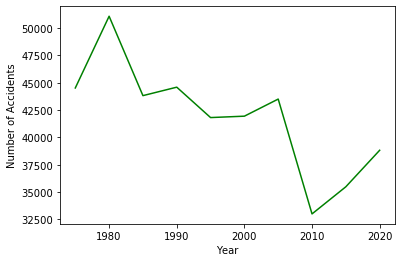

In [29]:
dataframe= pd.DataFrame()
fatals= []
for i in years:
    curr_df= pd.read_csv(f"accident_all_years/{i}_accident.csv", encoding = 'ISO-8859-1')
    dataframe= pd.concat([dataframe, curr_df]).reset_index(drop=True)
    fatals.append(curr_df.FATALS.sum())

accidents_midnight= 0  
for h in [21, 22, 23, 24, 0, 1, 2, 3]:
    accidents_midnight += dataframe[dataframe.HOUR == h].shape[0]
    
accidents_snowy= dataframe[dataframe.WEATHER == 4].shape[0]
    
print("Total number of accidents from 1975-2020:", dataframe.shape[0])
print(f"Total persons involved in accidents: {dataframe.PERSONS.sum()}")
print(f"Total persons died in accidents: {dataframe.FATALS.sum()}")
print(f"The ratio of accidents in midnight: {(accidents_midnight/dataframe.shape[0])*100} %")
print(f"The ratio of accidents in snowy conditions: {(accidents_snowy/dataframe.shape[0])*100} %")
plt.plot(years, fatals, color= 'g')
plt.ylabel("Number of Accidents")
plt.xlabel("Year")
plt.show()

In [12]:
print("Mean of fatal accidents:", round(dataframe[dataframe.DRUNK_DR!=0].FATALS.mean(), 2))

curr_df= pd.read_csv("accident_all_years/1975_accident.csv", encoding = 'ISO-8859-1')
curr_df= curr_df.sort_values('FATALS')
low_five= list(curr_df.groupby("STATE").FATALS.agg('sum').sort_values().head().index)
upper_five= list(curr_df.groupby("STATE").FATALS.agg('sum').sort_values().tail().index)

print("Top 5 states with the highest rate of fatal accidents:", upper_five)
print("Lower 5 states with the lowest rate of fatal accidents:", low_five)

Mean of fatal accidents: 1.13
Top 5 states with the highest rate of fatal accidents: [17, 42, 36, 48, 6]
Lower 5 states with the lowest rate of fatal accidents: [11, 44, 2, 10, 50]


In [13]:
curr_df= pd.read_csv("accident_all_years/1990_accident.csv", encoding= 'ISO-8859-1')
curr_df= curr_df.sort_values('FATALS')
low_five= list(curr_df.groupby("STATE").FATALS.agg('sum').sort_values().head().index)
upper_five= list(curr_df.groupby("STATE").FATALS.agg('sum').sort_values().tail().index)

print("Top 5 states with the highest rate of fatal accidents:", upper_five)
print("Lower 5 states with the lowest rate of fatal accidents:", low_five)

Top 5 states with the highest rate of fatal accidents: [42, 36, 12, 48, 6]
Lower 5 states with the lowest rate of fatal accidents: [11, 44, 50, 2, 38]


In [15]:
curr_df= pd.read_csv(f"accident_all_years/2020_accident.csv", encoding= 'ISO-8859-1')
print(f"Average Fatality rate in 2020: {curr_df.FATALS.mean()}")

Average Fatality rate in 2020: 1.0855001957166024


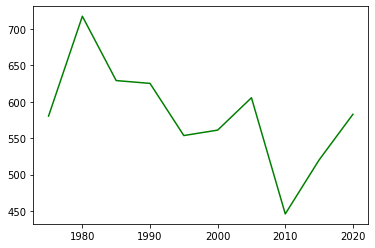

In [28]:
avg_rates= []
for i in years:
    curr_df= pd.DataFrame()
    curr_df2= pd.read_csv(f"accident_all_years/{i}_accident.csv", encoding= 'ISO-8859-1')
    top_avg= curr_df2.groupby("STATE").FATALS.agg('sum').sort_values().head().mean()
    down_avg= curr_df2.groupby("STATE").FATALS.agg('sum').sort_values().tail().mean()
    avg_rates.append((top_avg + down_avg)/5)
plt.plot(years, avg_rates, color= 'g')
plt.show()

*From the above graph, I have observed that the average rate has decreased till 2010 and it has started increasing in 2020.*

In [20]:
df= dataframe.loc[:, ["STATE", 'MONTH', 'DAY', 'YEAR', 'HOUR', 'PERSONS', 'MAN_COLL', 'LGT_COND',
                             'WEATHER', 'SCH_BUS', 'FATALS', 'DAY_WEEK', 'DRUNK_DR']].sample(n=5000)
df= df.dropna()
df.head()

,STATE,MONTH,DAY,YEAR,HOUR,PERSONS,MAN_COLL,LGT_COND,WEATHER,SCH_BUS,FATALS,DAY_WEEK,DRUNK_DR
143266,26,10,11,90,0,1,0,2,1,0.0,1,5,1
311437,6,7,25,2015,12,2,0,1,1,0.0,1,7,0
201780,4,2,27,2000,18,8,1,2,1,0.0,2,1,2
270896,47,9,11,2005,3,1,0,2,1,0.0,1,1,1
95711,13,11,13,85,14,2,2,1,1,0.0,1,4,0


In [24]:
scaler= MinMaxScaler()
df= pd.DataFrame(scaler.fit_transform(df), columns= df.columns)
df.head()

,STATE,MONTH,DAY,YEAR,HOUR,PERSONS,MAN_COLL,LGT_COND,WEATHER,SCH_BUS,FATALS,DAY_WEEK,DRUNK_DR
0,0.454545,0.818182,0.333333,0.005155,0.000000,0.041667,0.000000,0.125,0.0,0.0,0.00,0.666667,0.333333
1,0.090909,0.545455,0.800000,0.997423,0.121212,0.083333,0.000000,0.000,0.0,0.0,0.00,1.000000,0.000000
2,0.054545,0.090909,0.866667,0.989691,0.181818,0.333333,0.010101,0.125,0.0,0.0,0.25,0.000000,0.666667
3,0.836364,0.727273,0.333333,0.992268,0.030303,0.041667,0.000000,0.125,0.0,0.0,0.00,0.000000,0.333333
4,0.218182,0.909091,0.400000,0.002577,0.141414,0.083333,0.020202,0.000,0.0,0.0,0.00,0.500000,0.000000


In [25]:
model= NearestNeighbors(n_neighbors=20).fit(df[['WEATHER', 'FATALS']])
distances, indices= model.kneighbors(df[['WEATHER', 'FATALS']])
print(distances)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Variance: 36.741002036717965


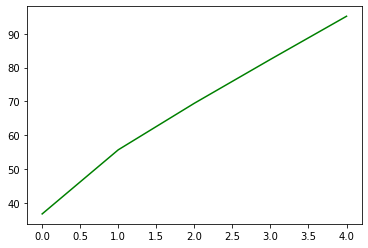

In [27]:
model= PCA(n_components= 0.90)
df= model.fit_transform(df)
plt.plot(np.cumsum(model.explained_variance_ratio_*100), color = 'g')
print(f"Variance: {np.cumsum(model.explained_variance_ratio_*100)[0]}")